# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

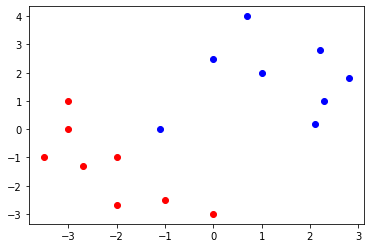

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here.**

**Note: You cannot use sklearn SVM functions here.**

In [ ]:
# Write your code here

In [ ]:
def svm_hard_margin(X, y, x_size, y_size, d = 2):
  a,b = cp.Variable((d,1)), cp.Variable()

  objective = cp.Minimize((cp.norm(a, 2)))

  # constraints = x_constraints +  y_constraints  
  constraints = ([a.T * X[i] + b >= 1  for i in range(x_size)] + 
                [a.T * X[i] + b <= -1 for i in range(x_size, x_size + y_size)])

  problem = cp.Problem(objective, constraints)

  problem.solve()
  print("Problem Status: %s" %problem.status)

  w,b = a.value, b.value
  return w,b

def prediction_accuracy(X, y, w, b):
    index = 0
    positive = 0
    negative = 0
    incorrect = 0
    for row in X:
      hypothesis = row.dot(w) + b
      if (hypothesis > 0 and y[index] == 1):
        positive += 1
      elif (hypothesis < 0 and y[index] == -1):
        negative += 1
      else:
        incorrect += 1
      index +=1

    print("Accuracy = ", (positive + negative) / len(X))

In [ ]:
w,b = svm_hard_margin(X, y, 8, 8)
print("W =\n", w)
print("B =", b)
prediction_accuracy(X, y, w, b)

Problem Status: optimal
W =
 [[-1.73913043]
 [-1.30434783]]
B = -2.9130434783188317
Accuracy =  1.0


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
# Write your code here

In [ ]:
def plot_svm(X, Y, w, b):
    class1 = []
    class2 = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            class1.append(X[i])
        else:
            class2.append(X[i])
    class1 = np.array(class1)
    class2 = np.array(class2)
    plt.scatter(class1[:, 0], class1[:, 1], c = 'r')
    plt.scatter(class2[:, 0], class2[:, 1], c = 'b')

    x_plot = np.linspace(-5, 5, 30)
    plt.plot(x_plot, (-b - (w[0] * x_plot) - 1) / w[1] , 'b--')
    plt.plot(x_plot, (-b - (w[0] * x_plot)) / w[1] , 'm')
    plt.plot(x_plot, (-b - (w[0] * x_plot) + 1) / w[1] ,'r--')

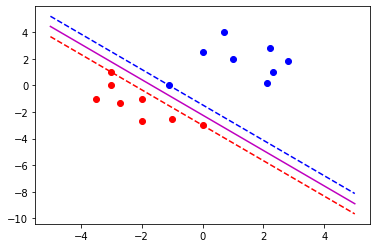

In [ ]:
plot_svm(X, y, w, b)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

In [ ]:
# Write your code here
import math

[-1.73913043 -1.30434783] -2.9130434783188317
[array([-3.,  1.]), array([ 0., -3.]), array([-1.1,  0. ])]


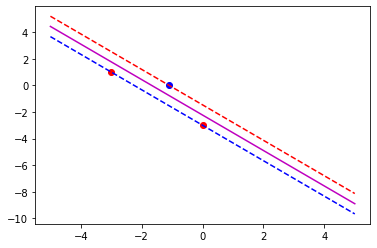

In [ ]:
W = w.flatten()
print(W,b)
index, tol = 0, 0.01
sv, labels = [], []

for x in X:
  hypothesis = np.dot(W, x) + b
  if y[index] == 1:
    t = math.fabs(1 - hypothesis)
    if math.fabs(1 - hypothesis) <= tol:
      sv.append(x)
      labels.append(y[index])
  else:
    if math.fabs(-1-hypothesis) <= tol:
      sv.append(x)
      labels.append(y[index])
  index += 1
print(sv)

plot_points(np.array(sv), np.array(labels))
x_plot = np.linspace(-5, 5, 30)
plt.plot(x_plot, (-b - (W[0] * x_plot) - 1) / W[1] , 'b--')
plt.plot(x_plot, (-b - (W[0] * x_plot)) / W[1] , 'm')
plt.plot(x_plot, (-b - (W[0] * x_plot) + 1) /W[1] ,'r--')

plt.show()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points

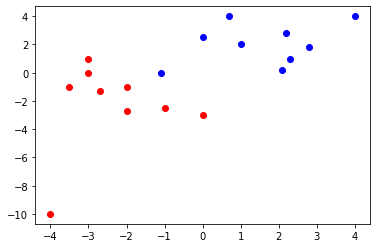

In [ ]:
# Write your code here
points_new = np.array([[4,4]])
X_new = np.insert(X, 8, [-4,-10], axis=0)
X_new = np.vstack([X_new, points_new])

y_new = np.insert(y, 8, [1])
y_new = np.append(y_new, [-1])
plot_points(X_new, y_new)

In [ ]:
# Solve for the decision boundary using this modified dataset

In [ ]:
w,b = svm_hard_margin(X_new, y_new, 8, 8)
print("W =",w)
print("B =",b)

Problem Status: infeasible
W = None
B = None


Problem Status: optimal
W = [[-1.73913044]
 [-1.30434783]]
B = -2.913043479077382
Accuracy =  1.0


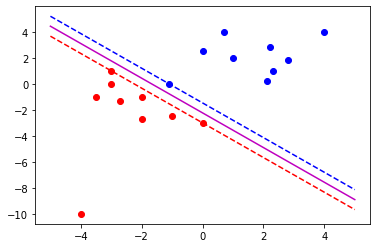

In [ ]:
w,b = svm_hard_margin(X_new, y_new, 9, 9)
print("W =",w)
print("B =",b)
prediction_accuracy(X_new,y_new, w, b)
plot_svm(X_new, y_new, w, b)

No the decision boundary hasn't changed

In [ ]:
def svm_soft_margin(X, y, C, x_size, y_size, d = 2):
  a, b = cp.Variable((d,1)), cp.Variable()
  u,v = cp.Variable(x_size), cp.Variable(y_size)
  gamma = cp.Parameter()
  gamma.value = C

  objective = cp.Minimize(cp.norm(a, 2) + gamma * (u * np.ones(x_size) + v * np.ones(y_size)))
  # constraints = x_constraints +  y_constraints + u_constraints + v_constraints
  constraints = ([a.T * X[i] + b >= 1-u[i]  for i in range(x_size)] +  
                 [a.T * X[i] + b <= -1+v[i - x_size] for i in range(x_size, x_size + y_size)] + 
                 [u[i] >= 0  for i in range(x_size)] + 
                 [v[i] >= 0  for i in range(y_size)])

  problem = cp.Problem(objective, constraints)

  problem.solve()
  print("Problem Status: %s"%problem.status)

  w, b = a.value, b.value
  return w,b

Problem Status: optimal
W =
 [[-0.35022764]
 [-0.29954473]]
B = -0.05068290650435438


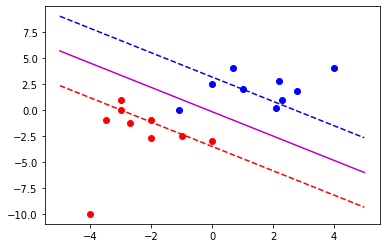

In [ ]:
w,b = svm_soft_margin(X_new, y_new, 0.1, 9, 9)
print("W =\n",w)
print("B =",b)
plot_svm(X_new, y_new, w, b)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

**Write your code here for C= 0.01**

Problem Status: optimal
W =
 [[-1.43253146e-12]
 [-1.55765611e-12]]
B = 0.06885090599738183
Accuracy =  0.5


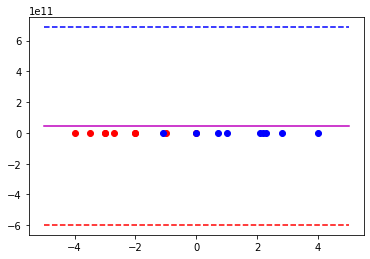

In [ ]:
# Write your code here for C= 0.01
w, b = svm_soft_margin(X_new, y_new, 0.01, 9, 9)
print("W =\n",w)
print("B =",b)

plot_svm(X_new, y_new, w, b)
prediction_accuracy(X_new, y_new, w, b)

**Write your code here for C= 0.1**

Problem Status: optimal
W =
 [[-0.35022764]
 [-0.29954473]]
B = -0.05068290650435438
Accuracy =  0.9444444444444444


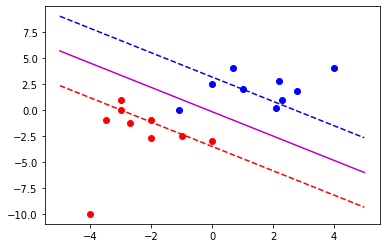

In [ ]:
w, b = svm_soft_margin(X_new, y_new, 0.1, 9, 9)
print("W =\n",w)
print("B =",b)

plot_svm(X_new, y_new, w, b)
prediction_accuracy(X_new, y_new, w, b)

**Write your code here for C= 3**

Problem Status: optimal
W =
 [[-1.73913044]
 [-1.30434783]]
B = -2.913043478685383
Accuracy =  1.0


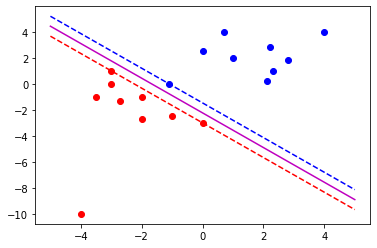

In [ ]:
w, b = svm_soft_margin(X_new, y_new, 3, 9, 9)
print("W =\n",w)
print("B =",b)

plot_svm(X_new, y_new, w, b)
prediction_accuracy(X_new, y_new, w, b)

**Write your code here for C= 10**

Problem Status: optimal
W =
 [[-1.73913044]
 [-1.30434783]]
B = -2.91304347879632
Accuracy =  1.0


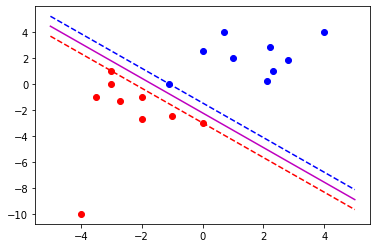

In [ ]:
w, b = svm_soft_margin(X_new, y_new, 10, 9, 9)
print("W =\n",w)
print("B =",b)

plot_svm(X_new, y_new, w, b)
prediction_accuracy(X_new, y_new, w, b)

**Write your code here for C= 100**

Problem Status: optimal
W =
 [[-1.73913043]
 [-1.30434783]]
B = -2.9130434784426154
Accuracy =  1.0


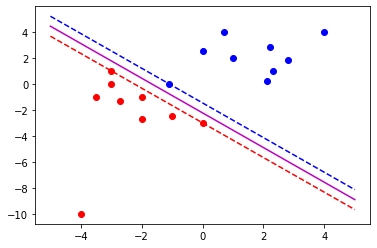

In [ ]:
w, b = svm_soft_margin(X_new, y_new, 100, 9, 9)
print("W =\n",w)
print("B =",b)

plot_svm(X_new, y_new, w, b)
prediction_accuracy(X_new, y_new, w, b)

**Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why? Show your results by appropriate plots?**

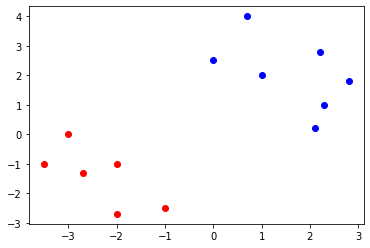

In [ ]:
# Support Vectors [[-3.,1.],  [ 0.,-3. ],  [-1.1,0.]]
indices = [0,1,3,4,5,6,9,10,11,12,13,14,15]
X_no_sv, y_no_sv = X[indices], y[indices]
plot_points(X_no_sv, y_no_sv)
plt.show()

Problem Status: optimal
W =
 [[-0.38493724]
 [-0.35146444]]
B = -0.12133891221723082
Accuracy =  1.0


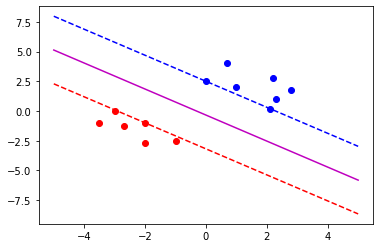

In [ ]:
w, b = svm_soft_margin(X_no_sv, y_no_sv, 100, 6, 7)
print("W =\n",w)
print("B =",b)

plot_svm(X_no_sv, y_no_sv, w, b)
prediction_accuracy(X_no_sv, y_no_sv, w, b)

After removing the old support vectors, we can see that the new data has both the classes separated well apart. The new decision boundary also depicts the same. Also the new support vectors are [[-2. -1. ], [ 0. 2.5], [ 2.1 0.2]], which also seems to be closest to the decision boundry as visualized from the plot.

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-12-02 21:19:42--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  27.9MB/s    in 0.3s    

2021-12-02 21:19:43 (27.9 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-12-02 21:19:43--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labels

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from mnist.loader import MNIST
from sklearn.model_selection import train_test_split

In [ ]:
# Load training dataset
data = MNIST('samples')
X_train, y_train = data.load_training()
X_train, y_train = np.array(X_train), np.array(y_train)

print (X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
X_test, y_test = data.load_testing()
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X = X.reshape((70000,784))/ 255
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49000, 784) (21000, 784) (49000,) (21000,)


In [38]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
def report(y_test, y_pred, clf, X_test, conf_mat):
  print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=predicted), "\n")
  
  print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")
  
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
  idx = random.sample(range(0, 10000), 4)
  k = 0
  for i, ax, prediction in zip(idx, axes, predicted):
      ax.set_axis_off()
      image = X_test[i].reshape(28, 28)
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title(f'Prediction: {prediction}')
      i+=1
      if (i==4):
        break

In [44]:
print(f"Classification report for classifier {clf}:\n" f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2078
           1       0.96      0.99      0.97      2307
           2       0.92      0.94      0.93      2123
           3       0.90      0.93      0.91      2155
           4       0.93      0.96      0.94      2051
           5       0.92      0.89      0.91      1907
           6       0.97      0.96      0.96      2021
           7       0.95      0.94      0.95      2217
           8       0.93      0.90      0.92      2074
           9       0.94      0.90      0.92      2067

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[2029    0   11    3    6   11   11    0    6    1]
 [   0 2275    6    7    2    1    2    4   10    0]
 [   8   18 1992   26   14    2   18   17   25    3]
 [  11    7   39 2000    4   43    0   12   28   11]
 [   5   11   18    0 1959    1   11    2    3   41]
 [  25    8   16   84   10 1702   20    2   32    8]
 [  17    6   20    1   16   22 1935    0    4    0]
 [   2   12   36   19   17    4    0 2089    4   34]
 [  15   26   18   55   14   53    8   14 1860   11]
 [  11   14    4   23   65    9    0   54   19 1868]]


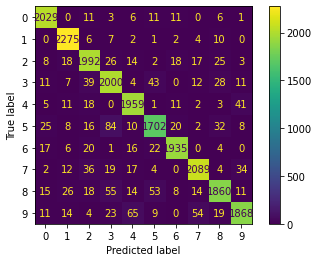

In [45]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
#disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [46]:
clf = SVC(kernel='linear', C = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [47]:
print(f"Classification report for classifier {clf}:\n" f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(C=100, kernel='linear'):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2078
           1       0.94      0.98      0.96      2307
           2       0.90      0.91      0.90      2123
           3       0.87      0.92      0.89      2155
           4       0.92      0.95      0.93      2051
           5       0.90      0.87      0.88      1907
           6       0.96      0.95      0.95      2021
           7       0.93      0.92      0.93      2217
           8       0.92      0.87      0.90      2074
           9       0.93      0.88      0.90      2067

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[2019    0   14    1    4   12   17    2    7    2]
 [   0 2261    5   10    2    1    2    5   20    1]
 [  20   35 1935   34   14    8   18   24   29    6]
 [   9   15   44 1972    2   54    2    8   36   13]
 [   6    7   30    1 1939    2    7    8    3   48]
 [  31   12   22   97   13 1660   23    4   34   11]
 [  19    7   24    0   24   34 1910    1    2    0]
 [   3   15   38   33   21    6    0 2047    4   50]
 [  21   28   34   73   11   56   11   18 1808   14]
 [  10   13    9   36   84   13    2   73   17 1810]]


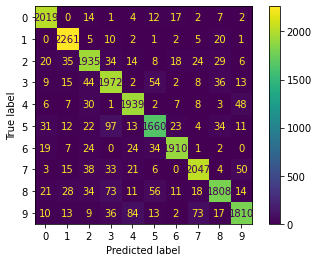

In [48]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
#disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [49]:
clf = SVC(kernel='linear', gamma = "auto")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [50]:
print(f"Classification report for classifier {clf}:\n" f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(gamma='auto', kernel='linear'):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2078
           1       0.96      0.99      0.97      2307
           2       0.92      0.94      0.93      2123
           3       0.90      0.93      0.91      2155
           4       0.93      0.96      0.94      2051
           5       0.92      0.89      0.91      1907
           6       0.97      0.96      0.96      2021
           7       0.95      0.94      0.95      2217
           8       0.93      0.90      0.92      2074
           9       0.94      0.90      0.92      2067

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[2029    0   11    3    6   11   11    0    6    1]
 [   0 2275    6    7    2    1    2    4   10    0]
 [   8   18 1992   26   14    2   18   17   25    3]
 [  11    7   39 2000    4   43    0   12   28   11]
 [   5   11   18    0 1959    1   11    2    3   41]
 [  25    8   16   84   10 1702   20    2   32    8]
 [  17    6   20    1   16   22 1935    0    4    0]
 [   2   12   36   19   17    4    0 2089    4   34]
 [  15   26   18   55   14   53    8   14 1860   11]
 [  11   14    4   23   65    9    0   54   19 1868]]


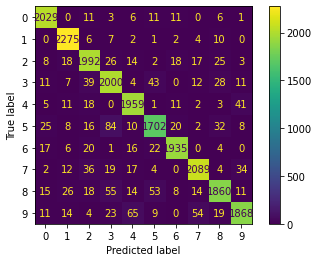

In [51]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
#disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")